# Sheet 7

## Reverse Mode Automatic Differentiation

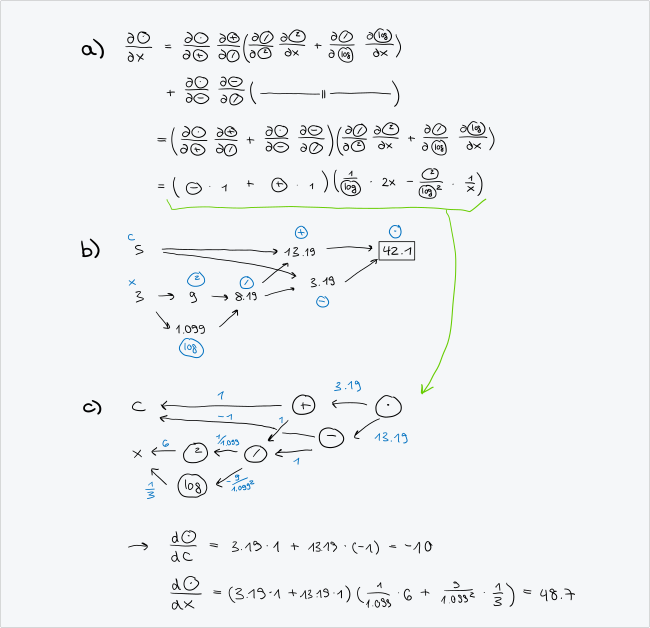

Backpropagation is simpler because we only need the derivatives of the "primitive" functions.

### (d)

In [2]:
import torch

x = torch.tensor([3.], requires_grad=True)
c = torch.tensor([5.], requires_grad=True)

div   = x**2 / torch.log(x)
prod  = (div + c) * (div - c)

prod.backward()

print(f"d/dx: {x.grad}")
print(f"d/dc: {c.grad}")

d/dx: tensor([48.7569])
d/dc: tensor([-10.])


## ADAM Optimizer

### (a)

The ADAM optimizer works according to the equations

$$\begin{align*}
    \boldsymbol{w}^{t+1} &= \boldsymbol{w}^t - \alpha \frac{\hat{\boldsymbol{m}}^t}{\sqrt{\hat{\boldsymbol{v}}^t} + \varepsilon}, &&
    \rightarrow \text{Update weights according to current momentum.} \\
    \boldsymbol{m}^t &= \beta \boldsymbol{m}^{t-1} + (1 - \beta)\, \boldsymbol{g}^t, &&
    \rightarrow \text{Update momentum to include new gradient direction.}\\
    \boldsymbol{v}^t &= \gamma \boldsymbol{v}^{t-1} + (1 - \gamma)\, (\boldsymbol{g}^t)^2, \quad &&
    \rightarrow \text{Incorporate steepness of gradient to adjust step size.} \\
    \hat{\boldsymbol{m}}^t &= \frac{\boldsymbol{m}^t}{1 - (\beta)^t}, &&
    \rightarrow \text{Counteract bias introduced by $\boldsymbol{m}^0=0$.} \\
    \hat{\boldsymbol{v}}^t &= \frac{\boldsymbol{v}^t}{1 - (\gamma)^t}, &&
    \rightarrow \text{Counteract bias introduced by $\boldsymbol{v}^0=0$.}
\end{align*}$$

The $\beta$ and $\gamma$ paramters allow for smoothing of the momentum and steepness over multiple steps.

### (b)

For the first iteration, $\boldsymbol{m}^0 = \boldsymbol{v}^0 = 0$, thus using the above equations (with $\varepsilon \ll 1$)
$$ \begin{align*}
  \boldsymbol{w}^1 &= \boldsymbol{w}^0, \qquad\quad \hat{\boldsymbol{m}}^1 = \boldsymbol{g}^0, \qquad\quad \hat{\boldsymbol{v}}^1 = (\boldsymbol{g}^0)^2 \\
   \boldsymbol{w}^2 &= \boldsymbol{w}^1 - \alpha \frac{\boldsymbol{g}^0}{\sqrt{(\boldsymbol{g}^0)^2} + \varepsilon} \approx \boldsymbol{w}^1 - \alpha\, \mathrm{sign}(\boldsymbol{g}^0).
\end{align*} $$

### (d)

Use a larger $\varepsilon$ for the first iteration.

### (e)

With $L_2$ regularization, the weight decay is incorporated into the momentum and steepness, which can interfere with the adaptive learning rate. By using a simple weight decay instead, it is applied after the step has been executed, thus it does not interact with the adaptive learning rate. This is what _AdamW_ has been developed for (which is arguably already enough of a proof that it should be better).

## Receptive Field of VGG16

### (a)

Starting after the last max pooling layer with a single pixel, we have a receptive field of $1 \times 1$. By going through a max pooling layer, the field doubles, and by going through a convolutional layer, the field extends in in both directions by one pixel. Therefore:

$$ \begin{align*}
          1 \times   1 & \to   2 \times   2 \\
    2\times 2 \to   4 \times   4 \to   6 \times   6 \to   8 \times   8 & \to 16 \times  16 \\
    16\times 16 \to  18 \times  18 \to  20 \times  20 \to  22 \times  22 & \to  44 \times  44 \\
    44 \times 44 \to  46 \times  46 \to  48 \times  48 \to  50 \times  50 & \to 100 \times 100 \\
    100 \times 100 \to 102 \times 102 \to 104 \times 104 & \to 208 \times 208 \\
    208 \times 208 \to 210 \times 210 & \to 212 \times 212
\end{align*} $$

Here, each row represents one "section" of layers, all of them ending with the respective max pooling layer, which doubles the receptive field. In the end, a single output pixel is influenced by a $212\times 212$ section of the input image.

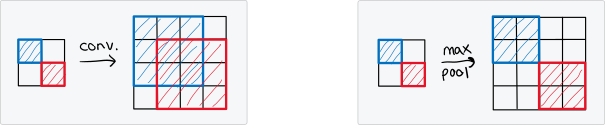

### (b)

Starting with the convolutional sections
$$ \begin{align*}
  &   (3 \times 3 \times   3 + 1) \times  64 \\
  & + (3 \times 3 \times  64 + 1) \times  64 \\
  & + (3 \times 3 \times  64 + 1) \times 128 \\
  & + (3 \times 3 \times 128 + 1) \times 128 \\
  & + (3 \times 3 \times 128 + 1) \times 256 \\
  & + 2 \times (3 \times 3 \times 256 + 1) \times 256 \\
  & + (3 \times 3 \times 256 + 1) \times 512 \\
  & + 5 \times (3 \times 3 \times 512 + 1) \times 512 = 14\,714\,688
\end{align*} $$

Then the fully connected layers:
$$ \begin{align*}
  & (7 \times 7 \times 512 + 1) \times 4096 \\
  & + (4096 + 1) \times 4096 \\
  & + (4096 + 1) \times 1000 \\
  & + (1000 + 1) \times 1000 = 124\,643\,856
\end{align*} $$

This makes a total of $139\,358\,544$ parameters, where the convolutional part makes up only $10.6\,\%$. 